In [22]:
import folium
import json
import requests
import pandas as pd
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
from sklearn.cluster import KMeans

In [23]:
dxb_communities=pd.read_csv("Dxb_Comm_LatLon.csv")
dxb_communities.head()

,CNAME_E,COMM_NUM,SHAPE_AREA,SHAPE_LEN,lat,lon
0,AL BADA',333,1.984701e+06,7946.070175,25.225314,55.268768
1,CORNICHE DEIRA,121,8.707842e+05,5165.842443,25.287165,55.317958
2,AL KHWANEEJ SECOND,282,1.269407e+07,14582.351508,25.230697,55.521222
3,AL SAFA FIRST,353,2.430429e+06,6705.662879,25.175690,55.238309
4,NAZWAH,736,1.305883e+07,15567.139691,25.024015,55.646574


In [24]:
print('Dubai has {} communities.'.format(dxb_communities.shape[0]))

Dubai has 226 communities.


In [25]:
#Foursquare credentials
CLIENT_ID = '3B3DTROSLAX0F04OWSUKSJMS3OJO211FLVXTWZSMO3HOIVTB' # your Foursquare ID
CLIENT_SECRET = 'ZP4YHODFLVZV3NWF5RVY3Q54XOPGTPACYITISSDX1QWOS1EO' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 3B3DTROSLAX0F04OWSUKSJMS3OJO211FLVXTWZSMO3HOIVTB
CLIENT_SECRET:ZP4YHODFLVZV3NWF5RVY3Q54XOPGTPACYITISSDX1QWOS1EO


In [26]:
# #getting high level categories
# categories_url = 'https://api.foursquare.com/v2/venues/categories?client_id={}&client_secret={}&v={}'.format(
#             CLIENT_ID, 
#             CLIENT_SECRET, 
#             VERSION)
            
# # make the GET request
# results = requests.get(categories_url).json()

In [27]:
# len(results['response']['categories'])

In [28]:
# categories_list = []
# # Let's print only the top-level categories and their IDs and also add them to categories_list

# def print_categories(categories, level=0, max_level=0):    
#     if level>max_level: return
#     out = ''
#     out += '-'*level
#     for category in categories:
#         print(out + category['name'] + ' (' + category['id'] + ')')
#         print_categories(category['categories'], level+1, max_level)
#         categories_list.append((category['name'], category['id']))
        
# print_categories(results['response']['categories'], 0, 0)

In [29]:
#Making Categories List so that API calls are not reqd.

categories_list = [['Arts & Entertainment', '4d4b7104d754a06370d81259'], 
                   ['College & University', '4d4b7105d754a06372d81259'], 
                   ['Event', '4d4b7105d754a06373d81259'],
                   ['Food', '4d4b7105d754a06374d81259'],
                   ['Nightlife Spot', '4d4b7105d754a06376d81259'],
                   ['Outdoors & Recreation', '4d4b7105d754a06377d81259'],
                   ['Professional & Other Places', '4d4b7105d754a06375d81259'],
                   ['Residence', '4e67e38e036454776db1fb3a'],
                   ['Shop & Service', '4d4b7105d754a06378d81259'],
                   ['Travel & Transport', '4d4b7105d754a06379d81259'],
                  ]

for c in categories_list:
    print(c[0],c[1])

Arts & Entertainment 4d4b7104d754a06370d81259
College & University 4d4b7105d754a06372d81259
Event 4d4b7105d754a06373d81259
Food 4d4b7105d754a06374d81259
Nightlife Spot 4d4b7105d754a06376d81259
Outdoors & Recreation 4d4b7105d754a06377d81259
Professional & Other Places 4d4b7105d754a06375d81259
Residence 4e67e38e036454776db1fb3a
Shop & Service 4d4b7105d754a06378d81259
Travel & Transport 4d4b7105d754a06379d81259


# Function to query the number of venues of Hi Level categories in a Community

In [30]:
# def get_venues_count(lat,long, radius, categoryId):
#     explore_url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}'.format(
#                 CLIENT_ID, 
#                 CLIENT_SECRET, 
#                 VERSION,
#                 lat,
#                 long,
#                 radius,
#                 categoryId)

#     # make the GET request
#     return requests.get(explore_url).json()['response']['totalResults']


In [31]:
# Create new dataframe to store venues data and initialize values to 0

no_of_hi_lvl_venues = dxb_communities.copy()
for c in categories_list:
    no_of_hi_lvl_venues[c[0]] = 0
    
no_of_hi_lvl_venues.head()

,CNAME_E,COMM_NUM,SHAPE_AREA,SHAPE_LEN,lat,lon,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,AL BADA',333,1.984701e+06,7946.070175,25.225314,55.268768,0,0,0,0,0,0,0,0,0,0
1,CORNICHE DEIRA,121,8.707842e+05,5165.842443,25.287165,55.317958,0,0,0,0,0,0,0,0,0,0
2,AL KHWANEEJ SECOND,282,1.269407e+07,14582.351508,25.230697,55.521222,0,0,0,0,0,0,0,0,0,0
3,AL SAFA FIRST,353,2.430429e+06,6705.662879,25.175690,55.238309,0,0,0,0,0,0,0,0,0,0
4,NAZWAH,736,1.305883e+07,15567.139691,25.024015,55.646574,0,0,0,0,0,0,0,0,0,0


In [32]:
# #Request number of venues, store result as CSV
# for i, row in no_of_hi_lvl_venues.iterrows():
#     for c in categories_list:        
#         no_of_hi_lvl_venues.loc[i, c[0]] = get_venues_count(no_of_hi_lvl_venues.lat.iloc[i], no_of_hi_lvl_venues.lon.iloc[i], radius=3500, categoryId=c[1])
#     print(i)
    
#     no_of_hi_lvl_venues.to_csv('Community_HiL_Venues_Nos.csv')

In [33]:
no_of_hi_lvl_venues=pd.read_csv("Community_HiL_Venues_Nos.csv")

# Drop 1st 2 columns which contain numners in the CSV File
no_of_hi_lvl_venues.drop(no_of_hi_lvl_venues.columns[[0,1]],axis = 1, inplace =True)

no_of_hi_lvl_venues

,CNAME_E,COMM_NUM,SHAPE_AREA,SHAPE_LEN,lat,lon,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,AL BADA',333,1.984701e+06,7946.070175,25.225314,55.268768,52,19,4,248,100,113,160,34,168,84
1,CORNICHE DEIRA,121,8.707842e+05,5165.842443,25.287165,55.317958,22,8,4,103,30,65,76,14,76,109
2,AL KHWANEEJ SECOND,282,1.269407e+07,14582.351508,25.230697,55.521222,0,10,0,9,0,7,5,1,5,5
3,AL SAFA FIRST,353,2.430429e+06,6705.662879,25.175690,55.238309,5,14,6,158,38,75,101,19,64,41
4,NAZWAH,736,1.305883e+07,15567.139691,25.024015,55.646574,0,0,0,3,0,6,1,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,JUMEIRA FIRST,332,9.960425e+06,15279.078410,25.229747,55.253889,23,13,5,190,107,93,121,27,76,87
222,MEREIYEEL,821,3.068814e+07,26755.113535,25.095226,55.512897,0,0,0,0,0,2,0,0,0,0
223,PORT SAEED,129,2.702123e+06,10392.490632,25.251006,55.332718,30,24,4,210,93,83,157,19,113,180
224,JABAL ALI INDUSTRIAL FIRST,599,2.206525e+07,19668.948471,24.999455,55.123519,0,2,0,18,3,3,47,4,11,6


# Exploratory Data Analysis on the Communities


In [34]:
from sklearn.preprocessing import MinMaxScaler

X = no_of_hi_lvl_venues.values[:,6:]
scaled_dataset = MinMaxScaler().fit_transform(X)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [35]:
no_of_hi_lvl_venues_scaled = pd.DataFrame(scaled_dataset)
no_of_hi_lvl_venues_scaled.columns = [c[0] for c in categories_list]
no_of_hi_lvl_venues_scaled.head()

,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,0.881356,0.275362,0.50,1.000000,0.657895,0.748344,0.842105,0.350515,0.908108,0.466667
1,0.372881,0.115942,0.50,0.415323,0.197368,0.430464,0.400000,0.144330,0.410811,0.605556
2,0.000000,0.144928,0.00,0.036290,0.000000,0.046358,0.026316,0.010309,0.027027,0.027778
3,0.084746,0.202899,0.75,0.637097,0.250000,0.496689,0.531579,0.195876,0.345946,0.227778
4,0.000000,0.000000,0.00,0.012097,0.000000,0.039735,0.005263,0.000000,0.021622,0.000000


In [36]:
%matplotlib inline 

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns

plt.style.use('ggplot') # optional: for ggplot-like style

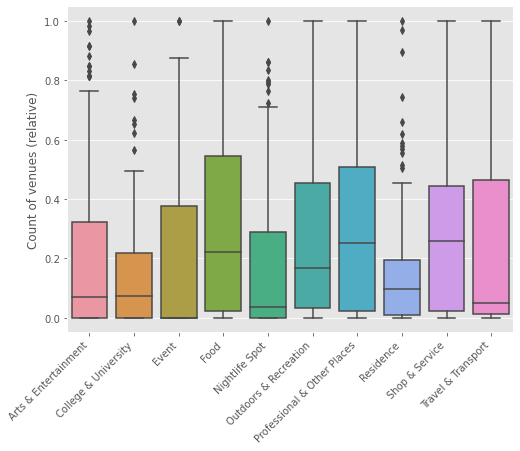

In [37]:
plt.figure(figsize=(8,6))
ax = sns.boxplot(data = no_of_hi_lvl_venues_scaled)
ax.set_ylabel('Count of venues (relative)')
#ax.tick_params(labelsize=20)
plt.xticks(rotation=45, ha='right')

plt.show()

# Clustering the Communities

## 1. Testing for fixed no of Clusters 

In [38]:
# set number of clusters
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(no_of_hi_lvl_venues_scaled)

kmeans_labels = kmeans.labels_

communities_hilvenues_cluster = no_of_hi_lvl_venues.copy()
communities_hilvenues_cluster['Cluster'] = kmeans_labels
#communities_hilvenues_cluster.head()

#dataframe to be used for box plot
communities_hilvenues_scaled_clustered = no_of_hi_lvl_venues_scaled.copy()
communities_hilvenues_scaled_clustered['Cluster'] = kmeans_labels
#communities_hilvenues_scaled_clustered.head()

Text(0, 0.5, 'No of Communities in Cluster')

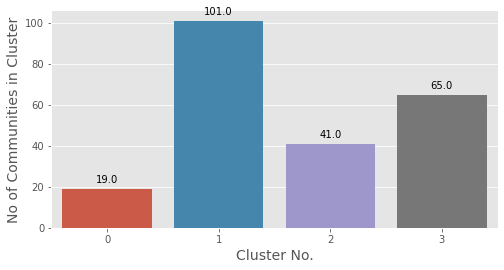

In [39]:

plt.figure(figsize=(8, 4))
comm_grps=communities_hilvenues_cluster.groupby(["Cluster"]).count()['CNAME_E']
comm_grps_df = comm_grps.to_frame()
comm_grps_df.reset_index(drop=False, inplace=True)

comm_grps_df = comm_grps_df.rename(columns = {'CNAME_E':'No of Communities'})


splot=sns.barplot(x="Cluster", y="No of Communities", data=comm_grps_df)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Cluster No.", size=14)
plt.ylabel("No of Communities in Cluster", size=14)



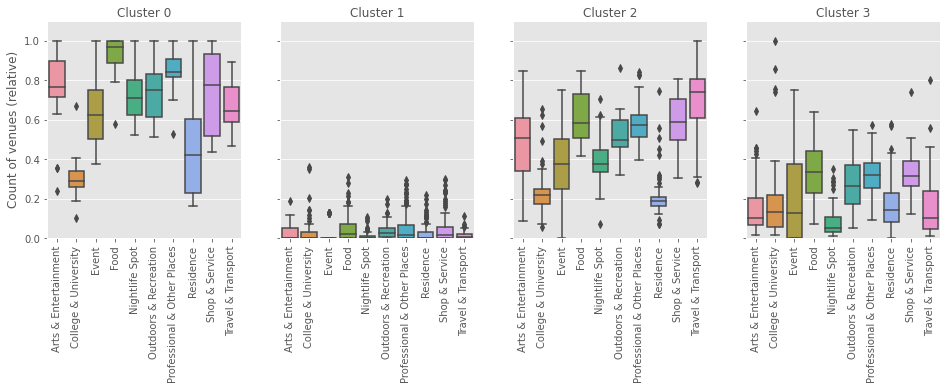

In [40]:
fig,axes= plt.subplots(1,kclusters,figsize=(16,4),sharey=True)

axes[0].set_ylabel('Count of venues (relative)')
#plt.set_xlabel('Venue category', fontsize='x-large')

for k in range(0, kclusters):
    #Set same y axis limits
    axes[k].set_ylim(0,1.1)
    axes[k].xaxis.set_label_position('top')
    axes[k].set_xlabel('Cluster ' + str(k))
    axes[k].tick_params()
    #print(k)
    plt.sca(axes[k])
    plt.xticks(rotation='vertical')
    sns.boxplot(data = communities_hilvenues_scaled_clustered[communities_hilvenues_scaled_clustered['Cluster'] == k].drop('Cluster',1), ax=axes[k])

plt.show()

## 2. Testing for no of Clusters upto a Max No. & Comparing the Box Plots

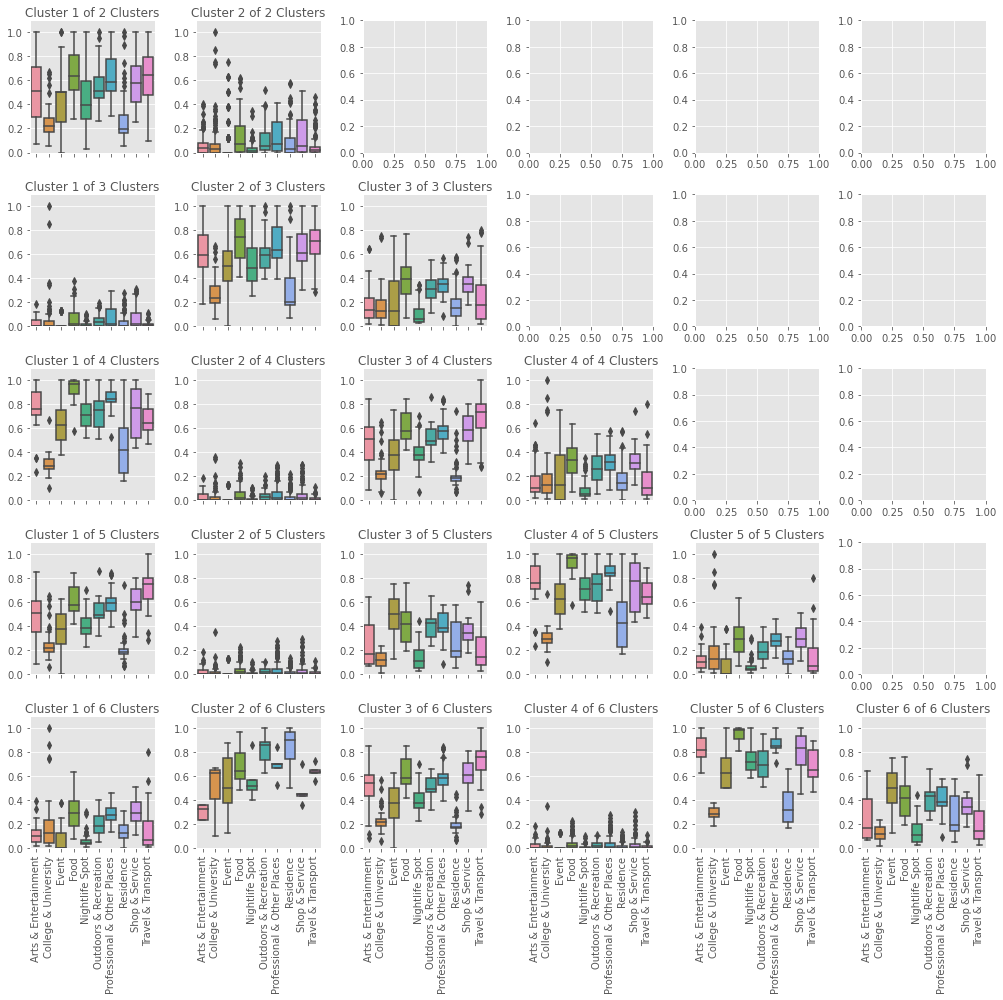

In [41]:
# No of Max Clusters
no_of_clusters= 6

#fig,axes= plt.subplots(1, mclusters ,figsize=(20,15),sharey=True)
fig,axes= plt.subplots(nrows=no_of_clusters-1, ncols=no_of_clusters ,figsize=(14,14))

#axes[0].set_ylabel('Count of venues (relative)')
#plt.set_xlabel('Venue category', fontsize='x-large')

for n in range(2, no_of_clusters+1):

    # set number of clusters
    #kclusters = 3

    # run k-means clustering
    #print('clustering for no_of_clusters n = '+ str (n))
    kmeans = KMeans(n_clusters= n, random_state=0).fit(no_of_hi_lvl_venues_scaled)
    kmeans_labels = kmeans.labels_

    communities_hilvenues_cluster = no_of_hi_lvl_venues.copy()
    communities_hilvenues_cluster['Cluster'] = kmeans_labels
    #communities_hilvenues_cluster.head()

    #dataframe to be used for box plot
    communities_hilvenues_scaled_clustered = no_of_hi_lvl_venues_scaled.copy()
    communities_hilvenues_scaled_clustered['Cluster'] = kmeans_labels
    #communities_hilvenues_scaled_clustered.head()

    
    #axes[0].set_ylabel('Count of venues (relative)')
    for k in range(0, n):
        #Set same y axis limits
        #print(n-2,k)
        axes[n-2,k].set_ylim(0,1.1)
        axes[n-2,k].xaxis.set_label_position('top')
        axes[n-2,k].set_xlabel('Cluster ' + str(k+1) + ' of ' +str(n) + ' Clusters')
        if n-2 != no_of_clusters-2: axes[n-2,k].tick_params(labelbottom=False)
        plt.xticks(rotation='vertical')
        axes[n-2,k].xaxis.set_ticklabels([])

        plt.sca(axes[n-2,k])

        sns.boxplot(data = communities_hilvenues_scaled_clustered[communities_hilvenues_scaled_clustered['Cluster'] == k].drop('Cluster',1), ax=axes[n-2,k])

        fig.tight_layout()

plt.show()


# Creating Datafile of Finalized Dataframe of Clusters

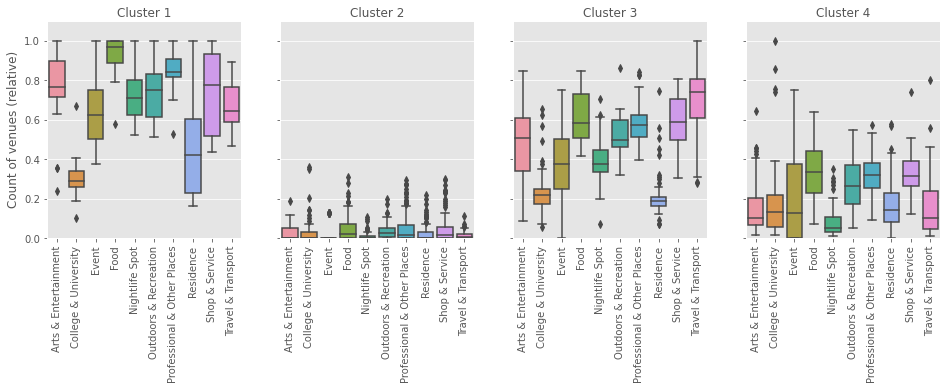

In [42]:
# set number of clusters
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(no_of_hi_lvl_venues_scaled)

kmeans_labels = kmeans.labels_

communities_hilvenues_cluster = no_of_hi_lvl_venues.copy()
communities_hilvenues_cluster['Cluster'] = kmeans_labels
#communities_hilvenues_cluster.head()

#dataframe to be used for box plot
communities_hilvenues_scaled_clustered = no_of_hi_lvl_venues_scaled.copy()
communities_hilvenues_scaled_clustered['Cluster'] = kmeans_labels
#communities_hilvenues_scaled_clustered.head()

fig,axes= plt.subplots(1,kclusters,figsize=(16,4),sharey=True)

axes[0].set_ylabel('Count of venues (relative)')
#plt.set_xlabel('Venue category', fontsize='x-large')

for k in range(0, kclusters):
    #Set same y axis limits
    axes[k].set_ylim(0,1.1)
    axes[k].xaxis.set_label_position('top')
    axes[k].set_xlabel('Cluster ' + str(k+1))
    axes[k].tick_params()
    #print(k)
    plt.sca(axes[k])
    plt.xticks(rotation='vertical')
    sns.boxplot(data = communities_hilvenues_scaled_clustered[communities_hilvenues_scaled_clustered['Cluster'] == k].drop('Cluster',1), ax=axes[k])

plt.show()

In [43]:
communities_hilvenues_cluster.to_csv('Community_HiLevelVenues_Clusters.csv')